<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/PCA_Factor_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 - Dimensionality Reduction Methods
## Segment 2 - Principal component analysis (PCA)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import datasets

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

 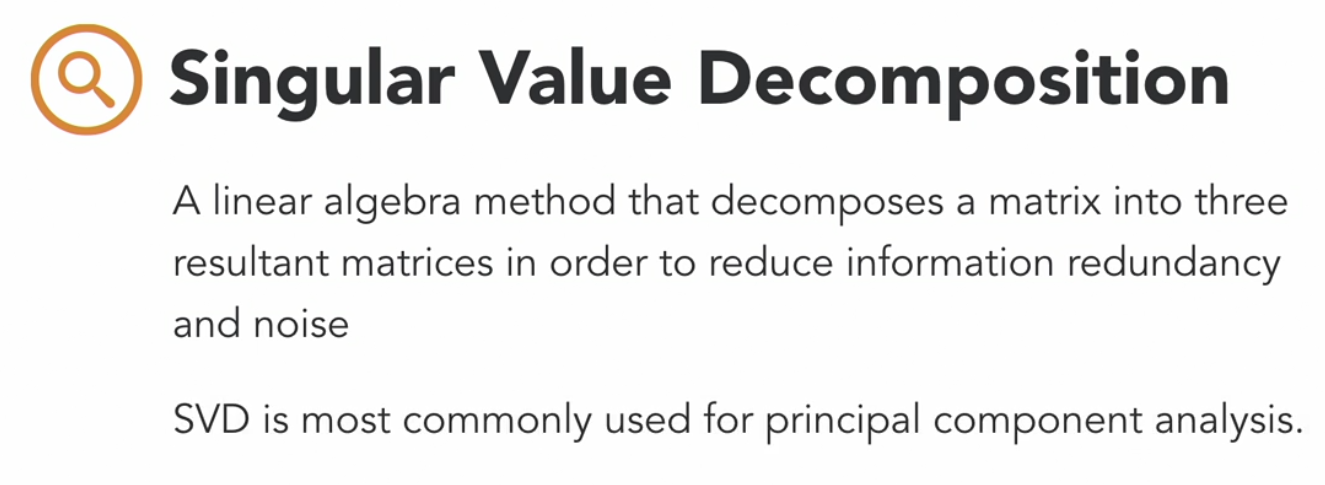

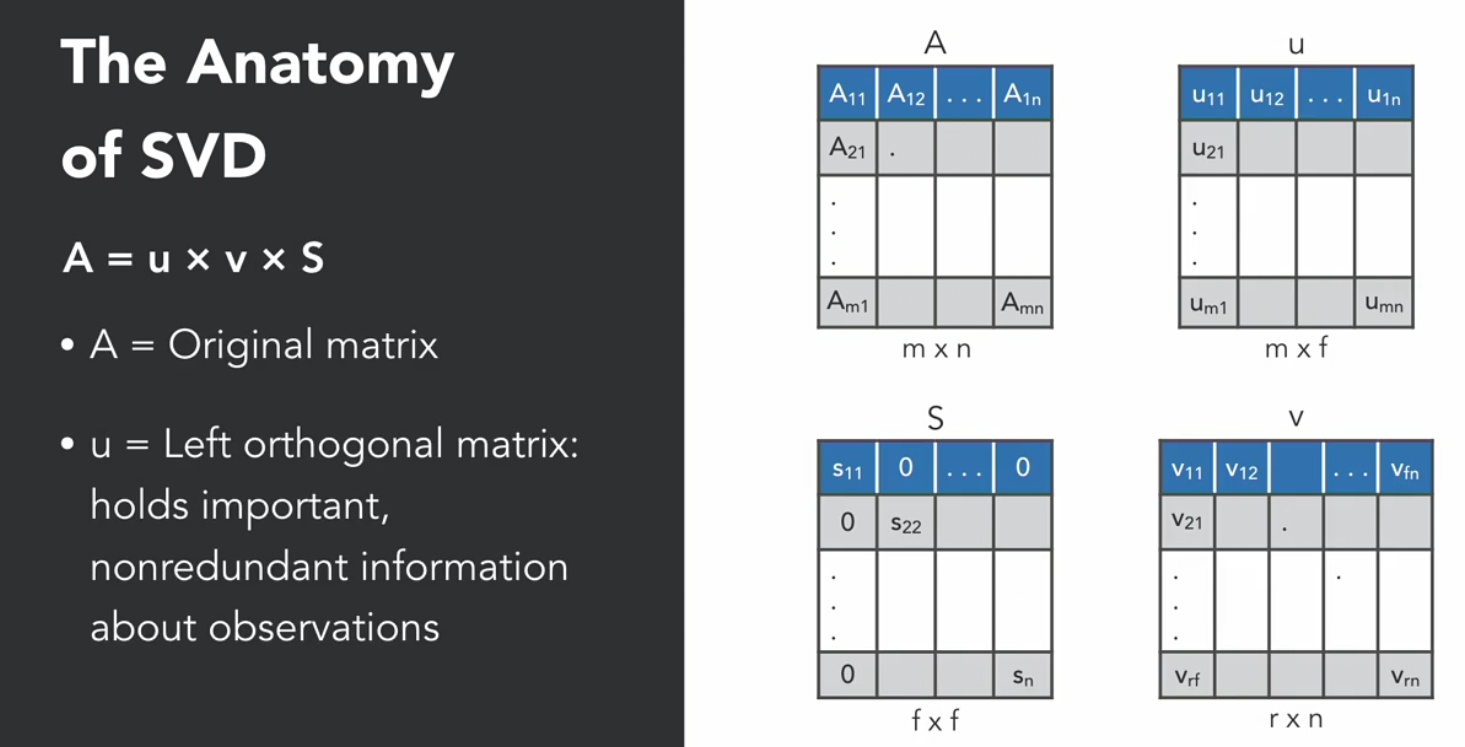

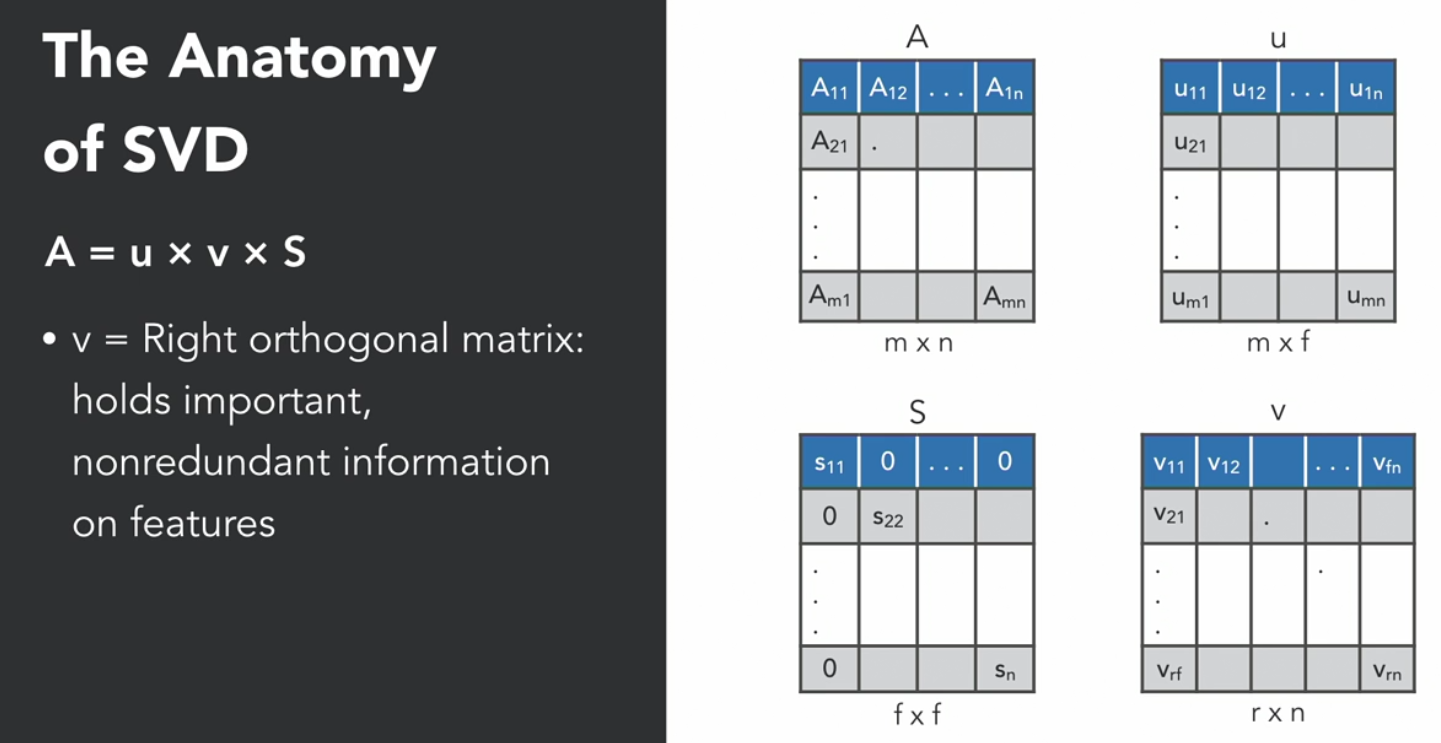

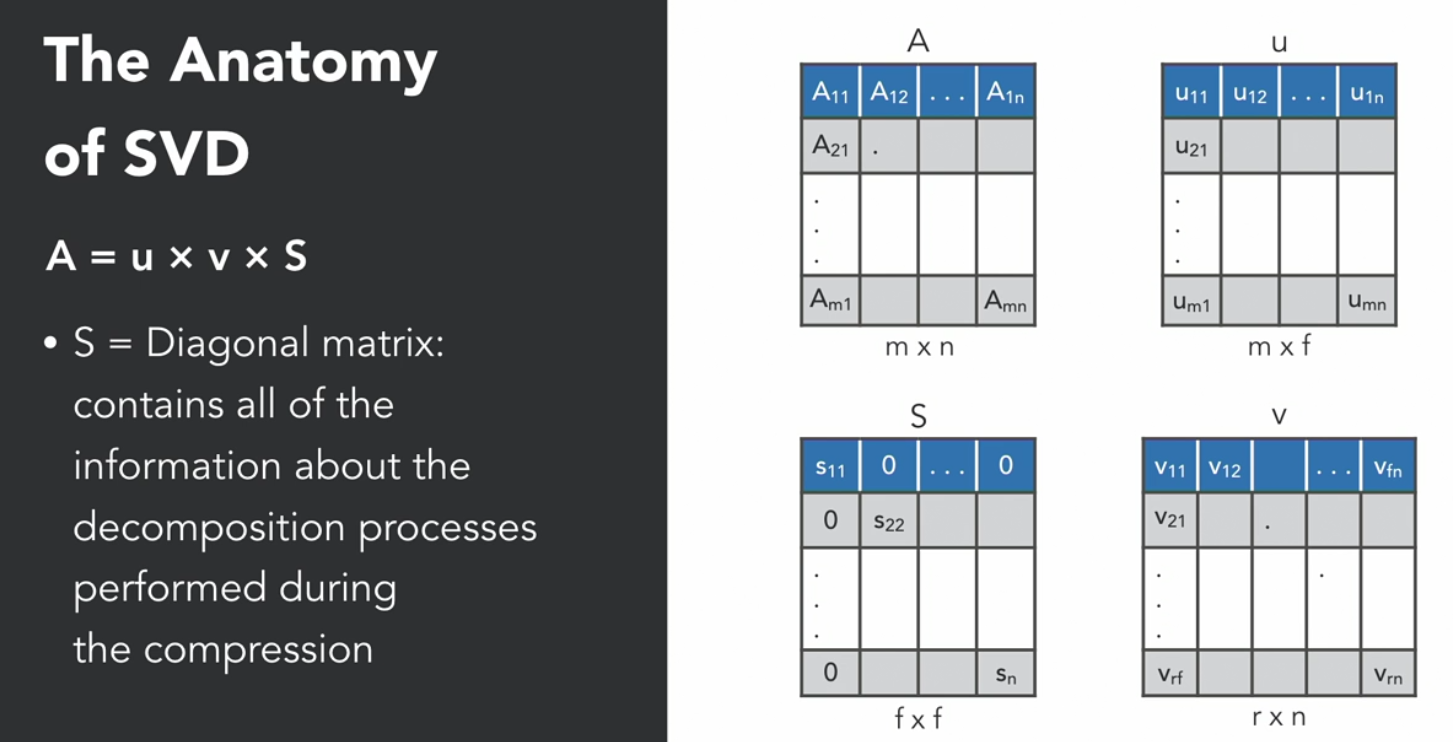

**the most common application of SVD. Principal component analysis is an unsupervised machine learning algorithm that discovers the relationships between variables and reduces variables down to a set of uncorrelated synthetic representations called principal components**



---



---



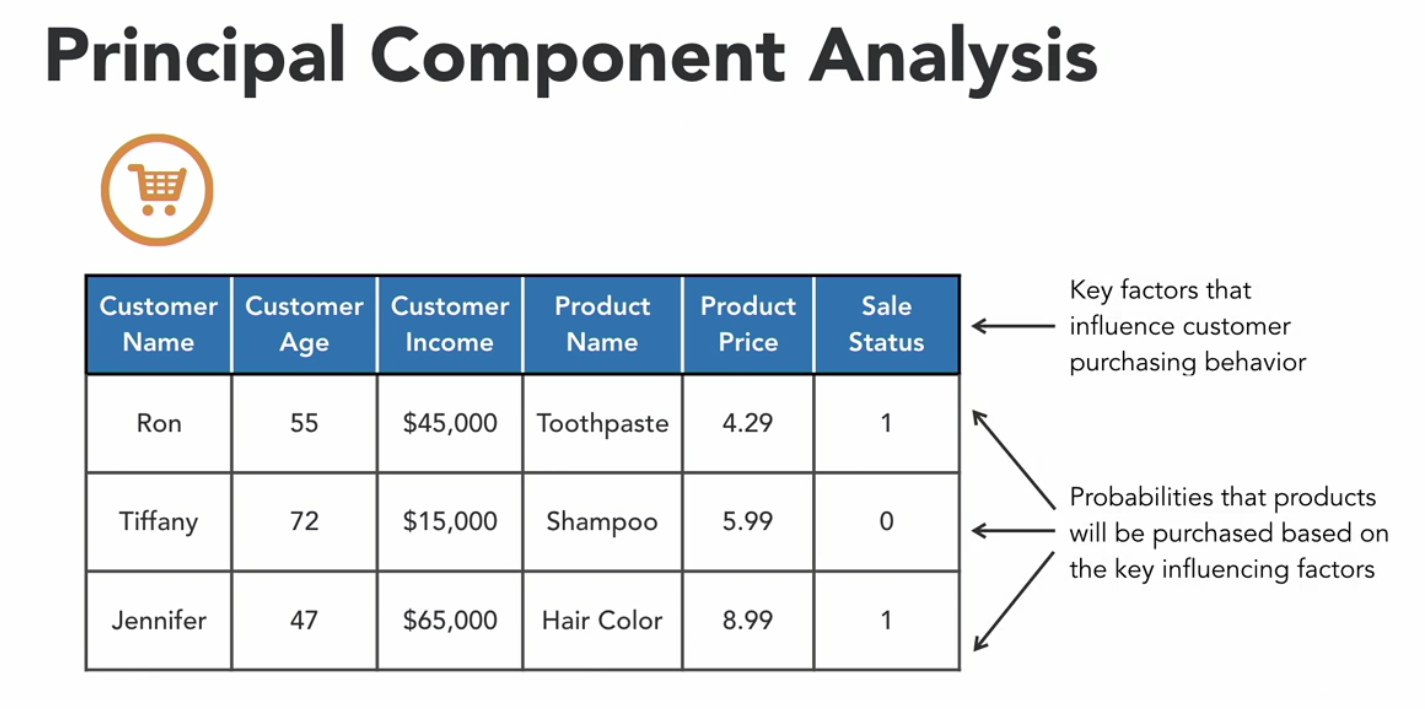

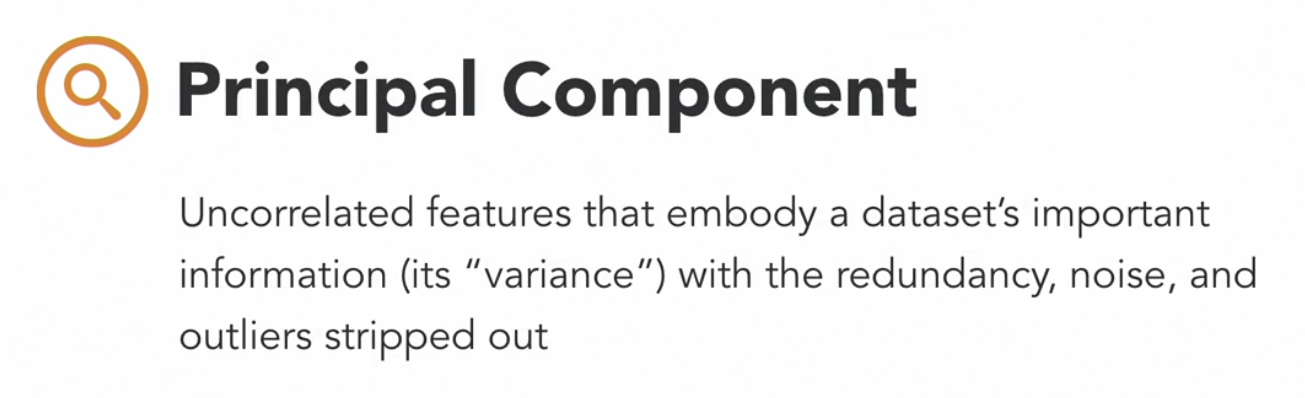

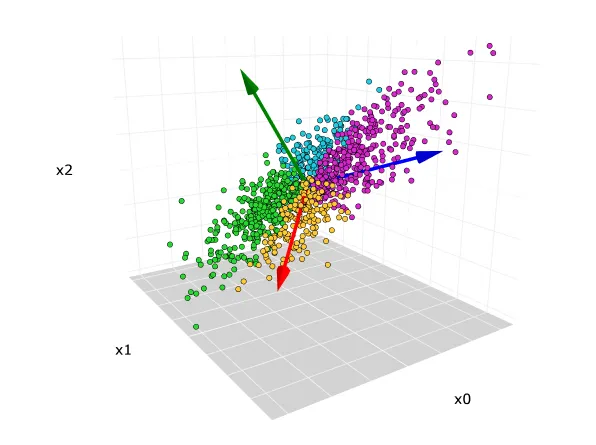

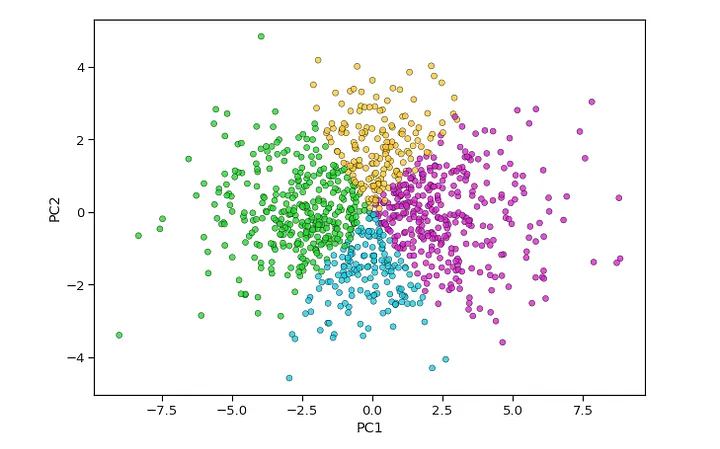

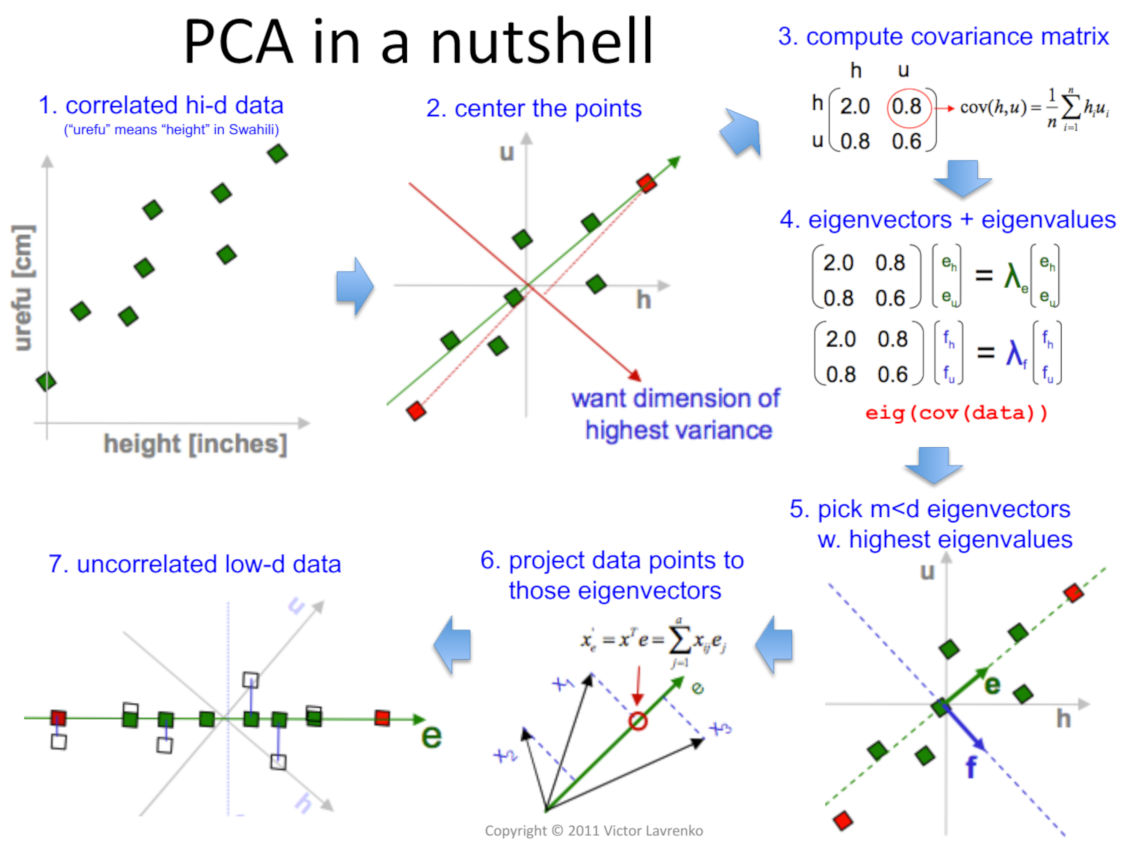

In [ ]:
# https://devopedia.org/principal-component-analysis

### PCA on the iris dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [ ]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)
iris_pca.shape


(150, 4)

In [ ]:
X.shape

(150, 4)

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris_pca[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [ ]:
iris_pca

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
pca.singular_values_

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [ ]:
pca.explained_variance_ratio_.sum()

1.0

**This means that 100% of the dataset's information is captured in four components that were returned.**

the explained variance of all the components is adding up to one. Let's take a look at what this all actually means. First, you need to understand what explained variance ratio is. This ratio tells us how much information is compressed into the first few components. You use explained ratio variance to calculate a cumulative variance. Then, with this cumulative variance you can figure out how many components to keep. You just need to make sure that you keep at least 70% of the dataset's original information

Look at the explained variance ratio. We see that the first component explained 92.4% of the dataset's variance. That means that it holds 92.4% of the data's information in one principal component. Pretty cool, right? And by taking the first two components, we only lose 2.3% of the dataset's information.

In [ ]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481
2          -0.582030          0.597911           0.076236          0.545831
3          -0.315487          0.319723           0.479839         -0.753657

<Axes: >

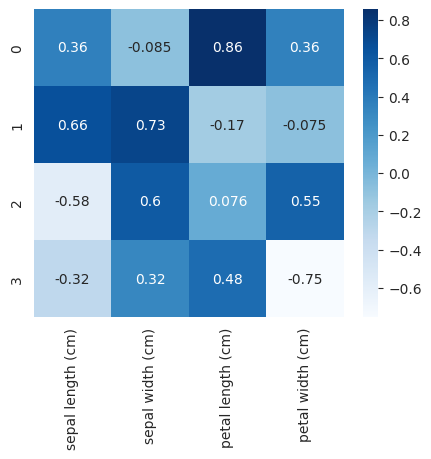

In [ ]:
sb.heatmap(comps, cmap="Blues", annot=True)

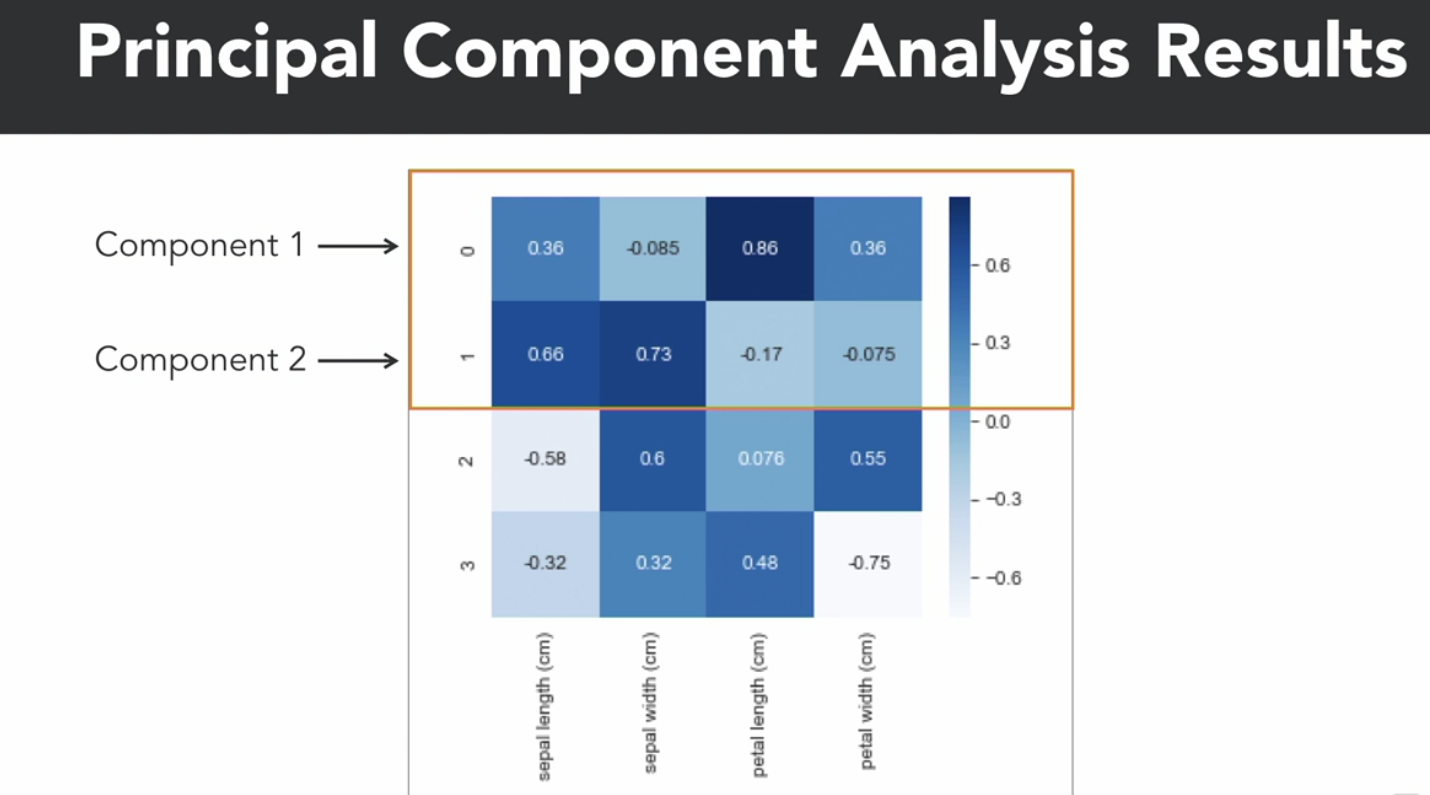

the first two principal components contained over 97.7% of the dataset's total information. Based on that information, we decided to keep only those two components

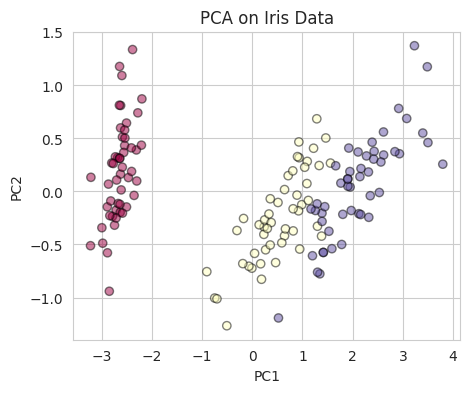

In [ ]:
#plot data in 2 dimensions with PCA using the first two principal components
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target, cmap="Spectral", edgecolor="black", alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Data")
plt.show()


*********************************************************************


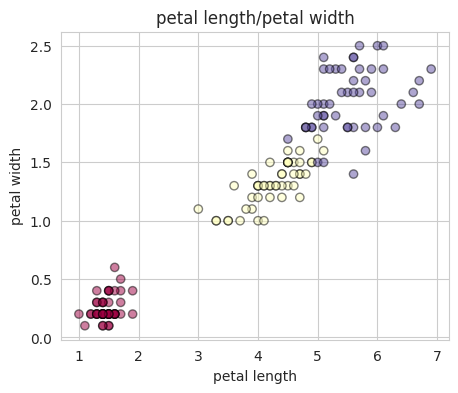

In [ ]:
print("*********************************************************************")
#plot data with petal length and petal width
plt.scatter(X[:,2], X[:,3], c=iris.target, cmap="Spectral", edgecolor="black", alpha=0.5)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length/petal width")
plt.show()


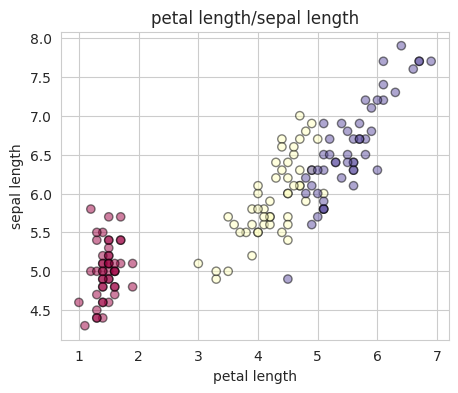

In [ ]:
#plot data with petal length and sepal legth
plt.scatter(X[:,2], X[:,0], c=iris.target, cmap="Spectral", edgecolor="black", alpha=0.5)
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.title("petal length/sepal length")
plt.show()


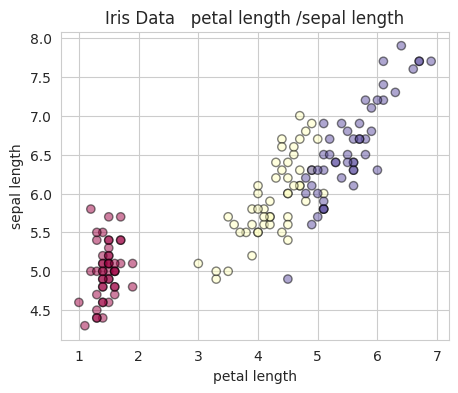

In [ ]:
#plot data with petal length and sepal length
plt.scatter(X[:,2], X[:,0], c=iris.target, cmap="Spectral", edgecolor="black", alpha=0.5)
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.title("Iris Data   petal length /sepal length")
plt.show()



---



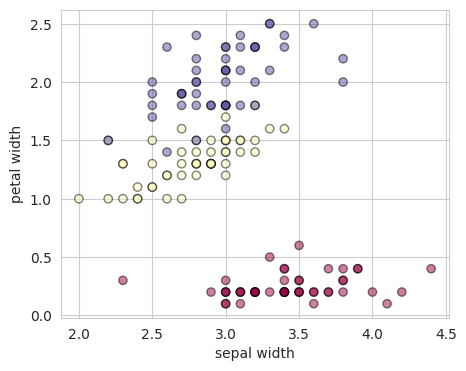

In [ ]:
#plot data with petal width and petal width
plt.scatter(X[:,1], X[:,3], c=iris.target, cmap="Spectral", edgecolor="black", alpha=0.5)
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()

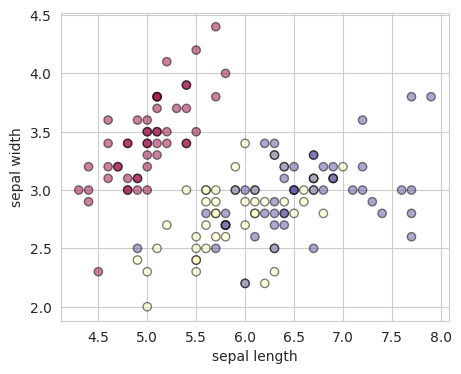

In [ ]:
#plot data with sepal length and sepal width
plt.scatter(X[:,0], X[:,1], c=iris.target, cmap="Spectral", edgecolor="black", alpha=0.5)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()



---



---



---

